In [52]:
#Load the data
import pandas as pd
from __future__ import division, print_function, unicode_literals 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
df= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",header=None,sep=',')

In [2]:
attribute_name = []
attribute_name.append("case_id")
attribute_name.append("type")

a = ['radius','texture','perimeter','area','smoothness','compactness',
     'concavity','concave points','symmetry','fractal dimension']

for i in range(0,10):
    b = "mean_" + a[i] 
    attribute_name.append(b)   
for i in range(0,10):
    b = "se_" + a[i]
    attribute_name.append(b)    
for i in range(0,10):
    b = "worst_" + a[i]
    attribute_name.append(b)
    
df.columns=attribute_name
#Explore the data
df.head()

,case_id,type,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df=df.dropna()
df.describe()

,case_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.iloc[:,1].value_counts()

B    357
M    212
Name: type, dtype: int64

In [6]:
#Correlation matrix
df.corr()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
2,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
4,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
5,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
7,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
8,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
9,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
10,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


array([[<AxesSubplot:title={'center':'case_id'}>,
        <AxesSubplot:title={'center':'mean_radius'}>,
        <AxesSubplot:title={'center':'mean_texture'}>,
        <AxesSubplot:title={'center':'mean_perimeter'}>,
        <AxesSubplot:title={'center':'mean_area'}>,
        <AxesSubplot:title={'center':'mean_smoothness'}>],
       [<AxesSubplot:title={'center':'mean_compactness'}>,
        <AxesSubplot:title={'center':'mean_concavity'}>,
        <AxesSubplot:title={'center':'mean_concave points'}>,
        <AxesSubplot:title={'center':'mean_symmetry'}>,
        <AxesSubplot:title={'center':'mean_fractal dimension'}>,
        <AxesSubplot:title={'center':'se_radius'}>],
       [<AxesSubplot:title={'center':'se_texture'}>,
        <AxesSubplot:title={'center':'se_perimeter'}>,
        <AxesSubplot:title={'center':'se_area'}>,
        <AxesSubplot:title={'center':'se_smoothness'}>,
        <AxesSubplot:title={'center':'se_compactness'}>,
        <AxesSubplot:title={'center':'se_concavity

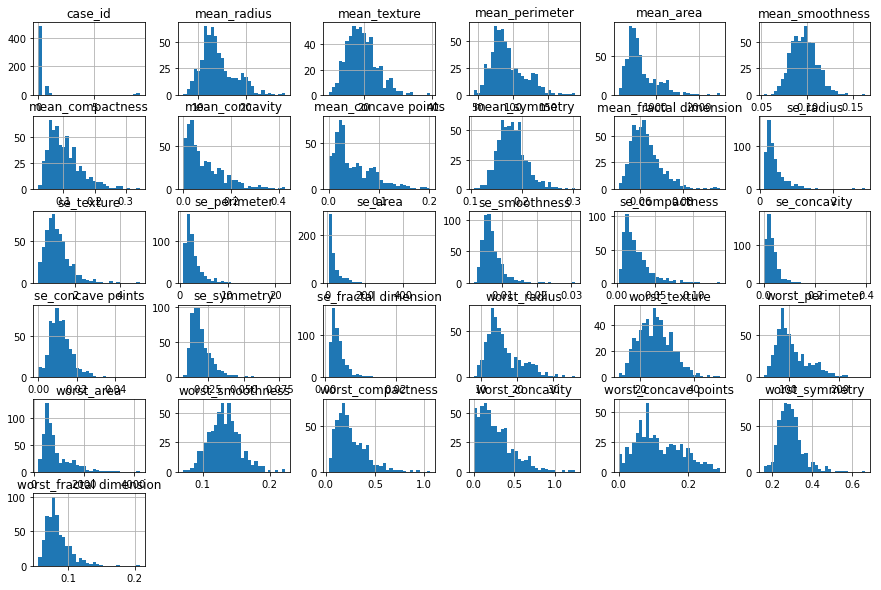

In [7]:
df.hist(bins=30,figsize=(15,10))

In [10]:
#knn for k=3
from sklearn import neighbors, datasets 
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix \nWithout Normalization',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        title = 'Normalized Confusion Matrix'
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)#,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 #fontsize = 15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1]:
#Drop unneeded columns 
#if 'case_id' in df.columns:
#    df = df.drop(columns=['case_id']) # exclude id column

In [2]:
#Balance data set
#df1_target_downsampled = resample(y, replace=False, n_samples=4777, random_state=42) 

#Transform categorical
#df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}).astype('int64')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y) #Stratify=y ensures that there are enough of both variables in both training and test

In [12]:
#Standardize
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set X by centering and scaling

In [13]:
#Set parameters and train the model
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(n_neighbors=3,
                           p=2, #Euclidean distance, p1 is for manhattan
                           metric='minkowski')
knn = knn.fit(X_train_std, y_train)

In [59]:
#Evaluate model
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score
# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)
# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

#Precision
print('Precision (out-of-sample): %.2f' % precision_score(y_test, y_pred,pos_label="M"))
print('Precision (in-sample): %.2f' % precision_score(y_train, y_pred_insample,pos_label="M"))

#Precision
print('F-score (out-of-sample): %.2f' % f1_score(y_test, y_pred,pos_label="M"))
print('F-score (in-sample): %.2f' % f1_score(y_train, y_pred_insample,pos_label="M"))

#Precision
print('Recall (out-of-sample): %.2f' % recall_score(y_test, y_pred,pos_label="M"))
print('Recall (in-sample): %.2f' % recall_score(y_train, y_pred_insample,pos_label="M"))

print(classification_report(y_test, y_pred,target_names=['benign','malignant']))

Confusion_Matrix=pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=['Predicted benign','Predicted malignant'],
                             index=['True bening','True malignant'])
Confusion_Matrix

Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.99
Precision (out-of-sample): 0.98
Precision (in-sample): 0.99
F-score (out-of-sample): 0.94
F-score (in-sample): 0.98
Recall (out-of-sample): 0.91
Recall (in-sample): 0.97
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97       107
   malignant       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



,Predicted benign,Predicted malignant
True bening,106,1
True malignant,6,58


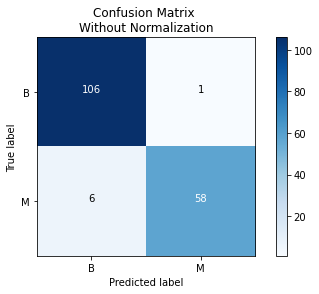

In [60]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=np.unique(y))

In [55]:
from sklearn import linear_model 
import warnings
warnings.filterwarnings('ignore')

clf = linear_model.LogisticRegression() 
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)

The weights of the attributes are: [[-1.78775662  0.09359862  0.15319442 -0.01202286  0.07565944  0.31694633
   0.46804654  0.20867388  0.12184248  0.01989493 -0.07361217 -0.86638302
  -0.06600505  0.07516836  0.01101907  0.05280805  0.08701847  0.02874627
   0.0349926   0.00351698 -1.69289605  0.14307295  0.09684482  0.03464611
   0.14246847  0.92568007  1.21588925  0.3909314   0.42954047  0.0916769 ]]


In [56]:
y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

B [0.97662585 0.02337415] 1.0


In [57]:
# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

#Precision
print('Precision (out-of-sample): %.2f' % precision_score(y_test, y_pred,pos_label="M"))
print('Precision (in-sample): %.2f' % precision_score(y_train, y_pred_insample,pos_label="M"))

#Precision
print('F-score (out-of-sample): %.2f' % f1_score(y_test, y_pred,pos_label="M"))
print('F-score (in-sample): %.2f' % f1_score(y_train, y_pred_insample,pos_label="M"))

#Precision
print('Recall (out-of-sample): %.2f' % recall_score(y_test, y_pred,pos_label="M"))
print('Recall (in-sample): %.2f' % recall_score(y_train, y_pred_insample,pos_label="M"))

print(classification_report(y_test, y_pred))
Confusion_Matrix=pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns=['Predicted benign','Predicted malignant'],
                             index=['True bening','True malignant'])
Confusion_Matrix

Accuracy (out-of-sample): 0.95
Accuracy (in-sample): 0.99
Precision (out-of-sample): 0.97
Precision (in-sample): 0.99
F-score (out-of-sample): 0.94
F-score (in-sample): 0.98
Recall (out-of-sample): 0.91
Recall (in-sample): 0.97
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       107
           M       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



,Predicted benign,Predicted malignant
True bening,105,2
True malignant,6,58


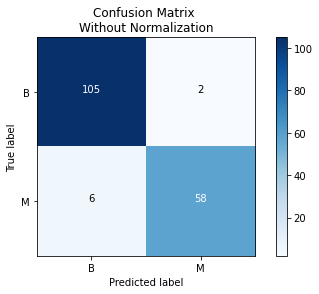

In [58]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=np.unique(y))